# Query data from NASA database and compare with own integrations.
Starting date: 01/01/2021.

---
Integrated 40 years.

Charon + 4 small moons.

by cristian.giuppone@unc.edu.ar Updated: 27/10/2021

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)
import pandas
plt.style.use('default')



In [2]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k # Para ua, dias, msol
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

import astropy.units as u
u.au

Unit("AU")

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive')   #se puede hacer con el boton del costado!!
cwd = os.getcwd()
cwd
#drive dir
drive_dir = "/content/drive/MyDrive/pluto"
os.chdir (drive_dir)
# !ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dire=''
c  = pandas.read_csv(dire+'planet101.dat', delimiter='\s+', skiprows=0)
p1 = pandas.read_csv(dire+'planet102.dat', delimiter='\s+', skiprows=0)
p2 = pandas.read_csv(dire+'planet202.dat', delimiter='\s+', skiprows=0)
p3 = pandas.read_csv(dire+'planet302.dat', delimiter='\s+', skiprows=0)
p4 = pandas.read_csv(dire+'planet402.dat', delimiter='\s+', skiprows=0)
#M1 = pandas.read_csv('catalogo.csv')
p1.columns = [ 't',  'a',  'e',  'i',  'M',  'w',  'N',  'ly',  'Me']#p1=np.loadtxt('1.aeia', unpack=True)
p2.columns = p1.columns
p3.columns = p1.columns
p4.columns = p1.columns
c.columns = p1.columns


In [6]:
!pip install astroquery --quiet
!pip install spiceypy --quiet   #https://github.com/AndrewAnnex/SpiceyPy#readme
import spiceypy as spice
# Print out the toolkit version
spice.tkvrsn("TOOLKIT")
epoch0 = 2451545.5
epoch0 = 2455198.00000 # 2021 1/

epoch0 = {'start':'2021-01-01', 'stop':'2061-03-01', 'step':'5d'}

     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 802 kB 65.5 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 3.5 MB 46.1 MB/s 
     |████████████████████████████████| 268 kB 5.5 MB/s 


In [7]:
# https://ssd.jpl.nasa.gov/?sat_elem#ref58
from astroquery.jplhorizons import Horizons
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objn = Horizons(id='902',     location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objk = Horizons(id='Kerberos',location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter
objh = Horizons(id='Hydra',   location='500@9',  epochs=epoch0,id_type='majorbody') #baricenter


In [8]:
### pluto center....sin sentido
# objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
# objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center


In [9]:
# print(obj)
elb = objb.elements(refplane='ecliptic') 
## elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
## sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
## nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
## ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
## hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
elp = objp.elements(refplane='ecliptic')
sty = objs.elements(refplane='ecliptic')
nix = objn.elements(refplane='ecliptic')
ker = objk.elements(refplane='ecliptic')
hyd = objh.elements(refplane='ecliptic')

In [10]:
# # print(el.columns) 
# print(*elb['a']*uam/1000.,*elb['e'],*elb['incl'],*elb['M'],*elb['w'],*elb['Omega'])
# print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])
# print(*sty['a']*uam/1000.,*sty['e'],*sty['incl'],*sty['M'],*sty['w'],*sty['Omega'])
# print(*nix['a']*uam/1000.,*nix['e'],*nix['incl'],*nix['M'],*elp['w'],*nix['Omega'])
# print(*ker['a']*uam/1000.,*ker['e'],*ker['incl'],*ker['M'],*elp['w'],*ker['Omega'])
# print(*hyd['a']*uam/1000.,*hyd['e'],*hyd['incl'],*hyd['M'],*elp['w'],*hyd['Omega'])


In [11]:
print(elb['a'][0]*uam/1000.)
print(sty['incl'][0],elb['incl'][0])

17491.55609730853
112.7415390578147 112.8720916202796


In [12]:
# print(el.columns) 
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')


17491.55609730853 0.001281178404793827 112.8720916202796 2.383146777107446 287.6481679147662 227.4090851043752
19594.27404690415	0.0001049170549352532	112.8720947303674	151.7963471054724	138.2351782301309	227.4090871094249
43824.383156339005	0.03800088990375599	112.7415390578147	16.88384655589125	350.1654082633733	227.1989988378795
49311.3233914249	0.01616541520809283	112.8938599005994	51.74855203147091	138.2351782301309	227.4028270657234
58146.830860892514	0.006102181490650623	112.5102046720823	324.3691870144822	138.2351782301309	227.1318166329677
65274.61218567828	0.01173420704380776	113.1046939241326	33.57627729129358	138.2351782301309	227.1875393106133


In [13]:
# print(el.columns) 
# print(elb['a'][0]*uam/1000./1188.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000./1188.,elp['e'][0]/1e-3,elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0]*uam/1000./1188.,sty['e'][0]/1e-3,sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0]*uam/1000./1188.,nix['e'][0]/1e-3,nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0]*uam/1000./1188.,ker['e'][0]/1e-3,ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0]*uam/1000./1188.,hyd['e'][0]/1e-3,hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')

16.49349667247824	0.1049170549352532	112.8720947303674	151.7963471054724	138.2351782301309	227.4090871094249
36.88921141105977	38.00088990375599	112.7415390578147	16.88384655589125	350.1654082633733	227.1989988378795
41.50784797257988	16.16541520809283	112.8938599005994	51.74855203147091	138.2351782301309	227.4028270657234
48.945143822300096	6.102181490650623	112.5102046720823	324.3691870144822	138.2351782301309	227.1318166329677
54.94495975225444	11.734207043807759	113.1046939241326	33.57627729129358	138.2351782301309	227.1875393106133


In [14]:
#  print(*elp['a']*uam/1000.,*elp['e'],*elp['incl'],*elp['M'],*elp['w'],*elp['Omega'])



In [15]:
# time = elp['datetime_jd'] 
# time

In [16]:
time = elp['datetime_jd'] 
time = time[-1]-time[0]
print (time/365.25)
time = elp['datetime_jd'] 
time = (time[:]-time[0])/365.25
time.shape

40.15058179329227


(2934,)

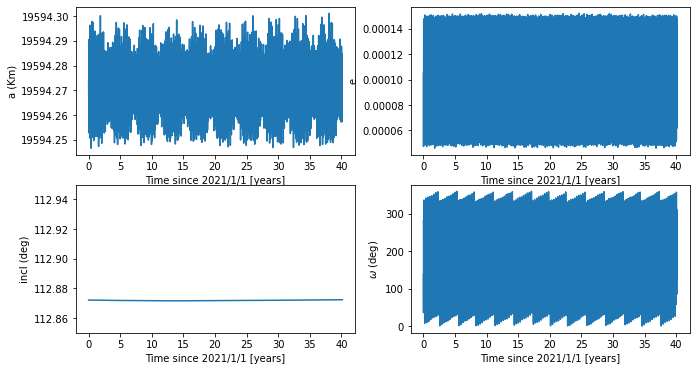

In [17]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['a']*uam/1000.)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['e'])
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('e')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(112.85,112.95)
plt.plot(time,elp['incl'])
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,elp['w'])
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\omega$ (deg)')



plt.savefig('Charon.png')

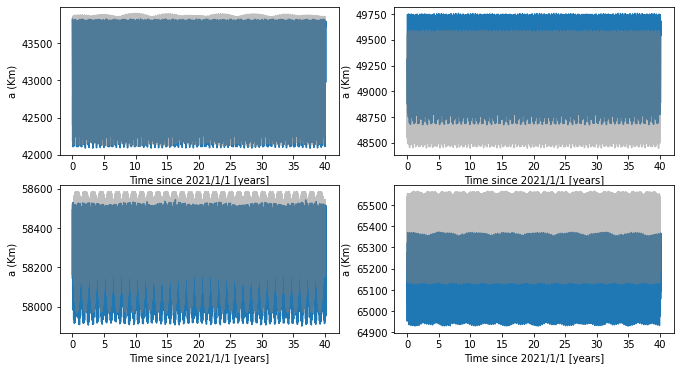

In [18]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('a (Km)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('a (Km)')

plt.savefig('a-moons.png')

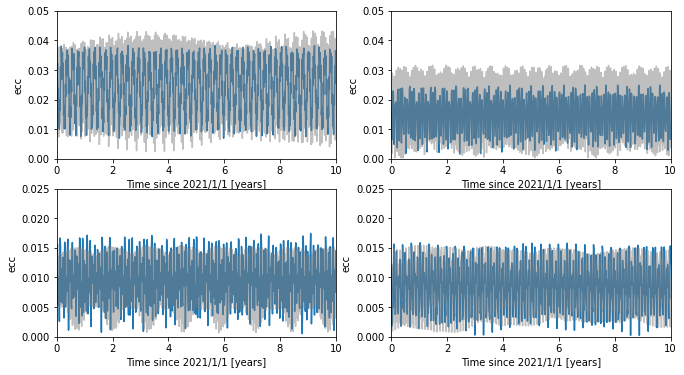

In [19]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('ecc')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('ecc')

plt.savefig('e-moons.png')

Text(0.5, 0, 'Time since 2021/1/1 [years]')

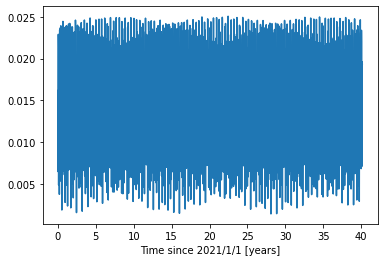

In [20]:

plt.plot(time,nix['e'])
plt.xlabel('Time since 2021/1/1 [years]')


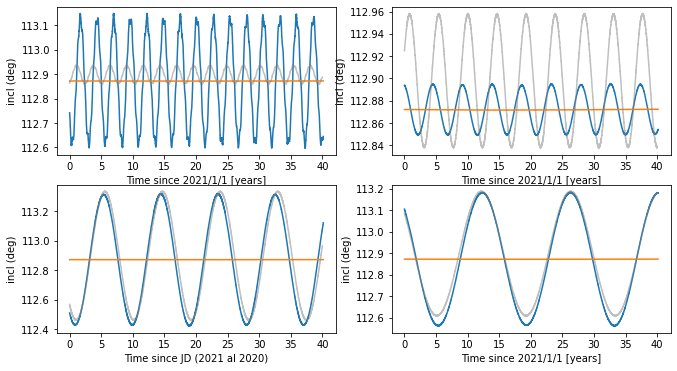

In [21]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel('incl (deg)')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel('incl (deg)')

plt.savefig('incl-moons.png')

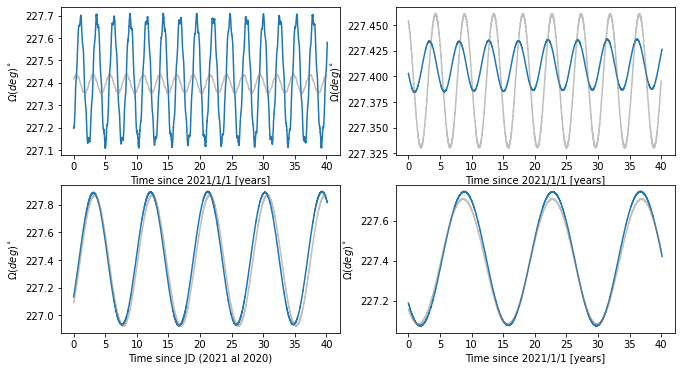

In [22]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['Omega'])
plt.plot(p1.t,p1.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['Omega'])
plt.plot(p2.t,p2.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['Omega'])
plt.plot(p3.t,p3.N, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel(r'$\Omega (deg)^\circ$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['Omega'])
plt.plot(p4.t,p4.N, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\Omega (deg)^\circ$')

plt.savefig('incl-moonsOmega.png')

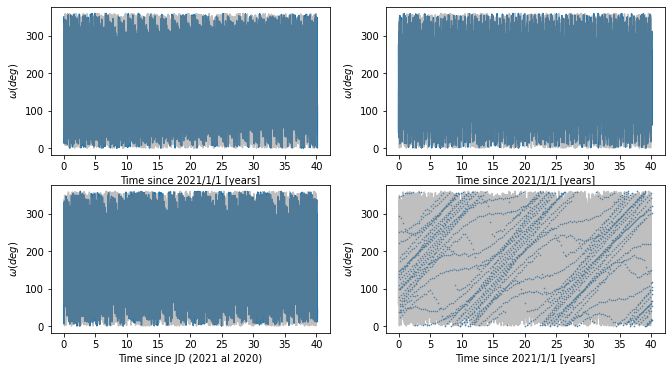

In [23]:
plt.figure(figsize=(11,6))

ax1=plt.subplot(2,2,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['w'])
plt.plot(p1.t,p1.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['w'])
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since JD (2021 al 2020)')
plt.ylabel(r'$\omega (deg)$')

ax1=plt.subplot(2,2,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.scatter(time,hyd['w'], s=0.3)
plt.plot(p1.t,p2.w, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [years]')
plt.ylabel(r'$\omega (deg)$')

plt.savefig('w-moons.png')

In [24]:
print ((np.max(sty['a'])-np.min(sty['a']))*uam/1000.,(np.max(nix['a'])-np.min(nix['a']))*uam/1000.,(np.max(ker['a'])-np.min(ker['a']))*uam/1000., (np.max(hyd['a'])-np.min(hyd['a']))*uam/1000.)
print ((np.max(sty['e'])-np.min(sty['e'])),(np.max(nix['e'])-np.min(nix['e'])),(np.max(ker['e'])-np.min(ker['e'])), (np.max(hyd['e'])-np.min(hyd['e'])))

print ((np.max(sty['incl'])-np.min(sty['incl'])),(np.max(nix['incl'])-np.min(nix['incl'])),(np.max(ker['incl'])-np.min(ker['incl'])), (np.max(hyd['incl'])-np.min(hyd['incl'])))

1737.1347460171912 1081.1860028378267 641.3670899200265 442.77331897634866
0.03145724239817281 0.023608677431556965 0.017035291492080832 0.015790822505473655
0.5524064122487005 0.04622833295809414 0.8988192268476922 0.6222394155729063


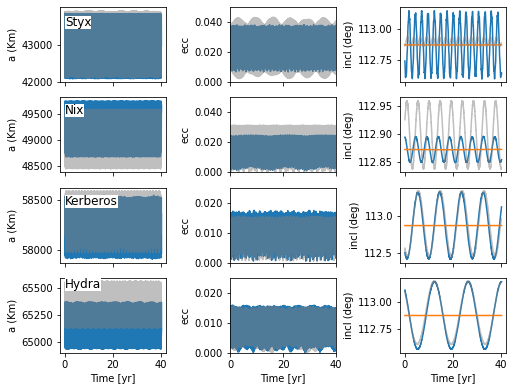

In [25]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.text(0, 43500, 'Styx', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.text(0,49500, 'Nix', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.text(0,58450, 'Kerberos', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time [yr]')
plt.ylabel('a (Km)')
plt.text(0,65500, 'Hydra', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,40)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,40)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,40)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.setp(ax1.get_xticklabels(), visible=False)

# plt.tight_layout()
ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,40)
plt.plot(time,hyd['e'])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moonst.png', dpi=250, bbox_inches='tight')


In [26]:
print ((np.max(elp['a'])-np.min(elp['a']))*uam/1000., np.max(elp['e'])-np.min(elp['e']),np.max(elp['incl'])-np.min(elp['incl']))
print ((np.max(sty['a'])-np.min(sty['a']))*uam/1000., np.max(sty['e'])-np.min(sty['e']),np.max(sty['incl'])-np.min(sty['incl']))
print ((np.max(nix['a'])-np.min(nix['a']))*uam/1000., np.max(nix['e'])-np.min(nix['e']),np.max(nix['incl'])-np.min(nix['incl']))
print ((np.max(ker['a'])-np.min(ker['a']))*uam/1000., np.max(ker['e'])-np.min(ker['e']),np.max(ker['incl'])-np.min(ker['incl']))
print ((np.max(hyd['a'])-np.min(hyd['a']))*uam/1000., np.max(hyd['e'])-np.min(hyd['e']),np.max(hyd['incl'])-np.min(hyd['incl']))




0.05459967064893976 0.00010600501223632153 0.0007292229767017488
1737.1347460171912 0.03145724239817281 0.5524064122487005
1081.1860028378267 0.023608677431556965 0.04622833295809414
641.3670899200265 0.017035291492080832 0.8988192268476922
442.77331897634866 0.015790822505473655 0.6222394155729063


In [27]:
print ((np.max(c['a'])-np.min(c['a'])), np.max(c['e'])-np.min(c['e']),np.max(c['i'])-np.min(c['i']))
print ((np.max(p1['a'])-np.min(p1['a'])), np.max(p1['e'])-np.min(p1['e']),np.max(p1['i'])-np.min(p1['i']))
print ((np.max(p2['a'])-np.min(p2['a'])), np.max(p2['e'])-np.min(p2['e']),np.max(p2['i'])-np.min(p2['i']))
print ((np.max(p3['a'])-np.min(p3['a'])), np.max(p3['e'])-np.min(p3['e']),np.max(p3['i'])-np.min(p3['i']))
print ((np.max(p4['a'])-np.min(p4['a'])), np.max(p4['e'])-np.min(p4['e']),np.max(p4['i'])-np.min(p4['i']))



0.0010000000002037268 1.8369000000001585e-07 0.0
1791.6129999999976 0.040849243900000005 0.08067000000002622
1146.6780000000072 0.03149158568 0.12103000000000463
615.7610000000059 0.01503046491 0.876269999999991
436.872000000003 0.015393464074 0.5801600000000064


In [28]:
np.max(p1['a'])

43900.238

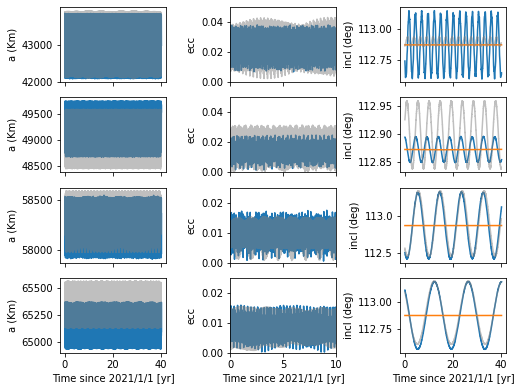

In [29]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['a']*uam/1000.)
plt.plot(p1.t,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['a']*uam/1000.)
plt.plot(p1.t,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['a']*uam/1000.)
plt.plot(p1.t,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['a']*uam/1000.)
plt.plot(p1.t,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,sty['e'])
plt.plot(p1.t,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time,nix['e'])
plt.plot(p2.t,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,ker['e'])
plt.plot(p3.t,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time,hyd['e'])
plt.plot(p4.t,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,sty['incl'])
plt.plot(time,elb['incl'])
plt.plot(p1.t,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,nix['incl'])
plt.plot(time,elb['incl'])
plt.plot(p2.t,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,ker['incl'])
plt.plot(time,elb['incl'])
plt.plot(p3.t,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.plot(time,hyd['incl'])
plt.plot(time,elb['incl'])
plt.plot(p4.t,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [yr]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('all-moons.png')


In [30]:
print(elp['a'][0],elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0], sep='\t')
print(sty['a'][0],sty['e'][0],sty['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0],sep='\t')
print(nix['a'][0],nix['e'][0],nix['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0],sep='\t')
print(ker['a'][0],ker['e'][0],ker['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0],sep='\t')
print(hyd['a'][0],hyd['e'][0],hyd['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0],sep='\t')

0.0001309796319641343	0.0001049170549352532	112.8720947303674	151.7963471054724	138.2351782301309	227.4090871094249
0.0002929479072882219	0.03800088990375599	112.7415390578147	16.88384655589125	350.1654082633733	227.1989988378795
0.0003296258373243337	0.01616541520809283	112.8938599005994	51.74855203147091	138.2351782301309	227.4028270657234
0.0003886875567734435	0.006102181490650623	112.5102046720823	324.3691870144822	138.2351782301309	227.1318166329677
0.000436333832027452	0.01173420704380776	113.1046939241326	33.57627729129358	138.2351782301309	227.1875393106133


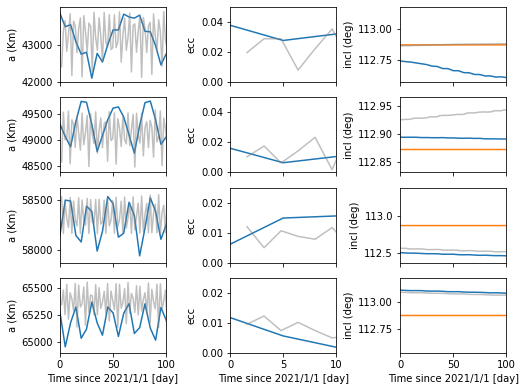

In [31]:
plt.figure(figsize=(8,6))


left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.6   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)


ax1=plt.subplot(4,3,1)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,sty['a']*uam/1000.)
plt.plot(p1.t*365.25,p1.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,4)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,nix['a']*uam/1000.)
plt.plot(p1.t*365.25,p2.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)

ax1=plt.subplot(4,3,7)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,ker['a']*uam/1000.)
plt.plot(p1.t*365.25,p3.a, c='gray',alpha=0.5)
plt.ylabel('a (Km)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,10)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,hyd['a']*uam/1000.)
plt.plot(p1.t*365.25,p4.a, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('a (Km)')
# plt.tight_layout()


ax1=plt.subplot(4,3,2)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25,sty['e'])
plt.plot(p1.t*365.25,p1.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,5)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.05)
plt.xlim(0.,10)
plt.plot(time*365.25,nix['e'])
plt.plot(p2.t*365.25,p2.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,8)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25,ker['e'])
plt.plot(p3.t*365.25,p3.e, c='gray',alpha=0.5)
plt.ylabel('ecc')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,11)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.ylim(0.,0.025)
plt.xlim(0.,10)
plt.plot(time*365.25,hyd['e'])
plt.plot(p4.t*365.25,p4.e, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('ecc')
# plt.tight_layout()

ax1=plt.subplot(4,3,3)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,sty['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p1.t*365.25,p1.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,6)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,nix['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p2.t*365.25,p2.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,9)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,ker['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p3.t*365.25,p3.i, c='gray',alpha=0.5)
plt.ylabel('incl (deg)')
plt.setp(ax1.get_xticklabels(), visible=False)
# plt.tight_layout()

ax1=plt.subplot(4,3,12)
ax1.yaxis.offsetText.set_visible(False)
ax1.ticklabel_format(useOffset=False)
plt.xlim(0,100)

plt.plot(time*365.25,hyd['incl'])
plt.plot(time*365.25,elb['incl'])
plt.plot(p4.t*365.25,p4.i, c='gray',alpha=0.5)
plt.xlabel('Time since 2021/1/1 [day]')
plt.ylabel('incl (deg)')
# plt.tight_layout()


plt.savefig('allday-moons.png')


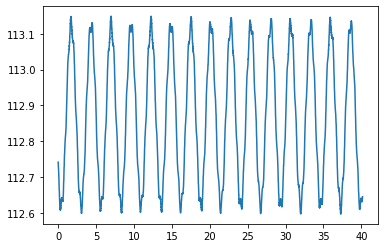

In [32]:
plt.plot(time,sty['incl'])


In [33]:
#test inclination.

### pluto center....sin sentido
objp = Horizons(id='Charon',  location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objb = Horizons(id='Charon',  location='500@9'  ,epochs=epoch0,id_type='majorbody') #baricenter
objs = Horizons(id='Styx',    location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objn = Horizons(id='902',     location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objk = Horizons(id='Kerberos',location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
objh = Horizons(id='Hydra',   location='500@999',epochs=epoch0,id_type='majorbody') #pluto center
# print(obj)
elb = objb.elements(refplane='ecliptic') 
elp = objp.elements(refplane='body')  # 999 solo si es pluto center no tiene sentido si es circumbinario
sty = objs.elements(refplane='body')  # 999 solo si es pluto center 
nix = objn.elements(refplane='body')  # 999 solo si es pluto center 
ker = objk.elements(refplane='body')  # 999 solo si es pluto center 
hyd = objh.elements(refplane='body')  # 999 solo si es pluto center 
# print(el)
# elp = objp.elements(refplane='body')
# sty = objs.elements(refplane='ecliptic')
# nix = objn.elements(refplane='ecliptic')
# ker = objk.elements(refplane='ecliptic')
# hyd = objh.elements(refplane='ecliptic')

In [34]:
print(elb['a'][0]*uam/1000.,elb['e'][0],elb['incl'][0],elb['M'][0],elb['w'][0],elb['Omega'][0])
print(elp['a'][0]*uam/1000.,elp['e'][0],elp['incl'][0],elp['M'][0],elp['w'][0],elp['Omega'][0])
print(sty['a'][0]*uam/1000.,sty['e'][0],sty['incl'][0]-elb['incl'][0]+elp['incl'][0],sty['M'][0],sty['w'][0],sty['Omega'][0])
print(nix['a'][0]*uam/1000.,nix['e'][0],nix['incl'][0]-elb['incl'][0]+elp['incl'][0],nix['M'][0],elp['w'][0],nix['Omega'][0])
print(ker['a'][0]*uam/1000.,ker['e'][0],ker['incl'][0]-elb['incl'][0]+elp['incl'][0],ker['M'][0],elp['w'][0],ker['Omega'][0])
print(hyd['a'][0]*uam/1000.,hyd['e'][0],hyd['incl'][0]-elb['incl'][0]+elp['incl'][0],hyd['M'][0],elp['w'][0],hyd['Omega'][0])


17491.55609730853 0.001281178404793827 112.8720916202796 2.383146777107446 287.6481679147662 227.4090851043752
19594.27404690415 0.0001049170549354914 0.07795360783904375 151.7963471055531 94.71868232764612 26.37998245837232
59554.379016933024 0.3016260407135665 -112.63132357438224 14.35233035366427 103.5358375929262 217.4290793063497
103887.14210508649 0.5188256088440497 -112.70394028088846 3.707557064569084 94.71868232764612 15.23222619175744
44788.82640984184 0.2563381183356185 -112.3997419504874 161.6995040781361 94.71868232764612 197.9370106486257
61682.784990438646 0.1566782469781144 -112.41678128941813 266.4749904632401 94.71868232764612 319.5709398772992
